# 2D CNN


In [68]:
!pip install tensorflow

^C


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling, BatchNormalization, Conv3D, MaxPool3D, Dropout
from sklearn.metrics import f1_score
import tensorflow.keras as keras


## Declaring the repositories with images

In [2]:
# Assuming your image folder is called 'dataset' and contains two subfolders: 'flipped' and 'noflipped'
flipped_dir = r'C:\Users\mbajd\Downloads\images\images\training\flip'
noflipped_dir = r'C:\Users\mbajd\Downloads\images\images\training\notflip'
test_dir = r'C:\Users\mbajd\Downloads\images\images\testing'

## Loading the images for training

In [3]:
# Load the image paths from the 'flipped' and 'noflipped' subfolders
flipped_images = glob.glob(flipped_dir + '/*.jpg')  # Assuming your images have the .jpg extension
noflipped_images = glob.glob(noflipped_dir + '/*.jpg')

# Assuming you have your labels as 'flipped' and 'noflipped'
flipped_labels = ['flip'] * len(flipped_images)
noflipped_labels = ['noflip'] * len(noflipped_images)

# Concatenate the flipped and noflipped images and labels
images = flipped_images + noflipped_images
labels = flipped_labels + noflipped_labels


## Organizing train and test data

In [88]:
# Split the dataset into training, validation, and test sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the test images and labels
test_flipped_images = glob.glob(test_dir + '/flip/*.jpg')
test_noflipped_images = glob.glob(test_dir + '/notflip/*.jpg')

test_images = test_flipped_images + test_noflipped_images
test_labels = ['flip'] * len(test_flipped_images) + ['noflip'] * len(test_noflipped_images)

## Data preprocessing

In [ ]:
input_shape = (32, 32, 3)

# Convert labels to binary representation (0 for flipped, 1 for noflipped)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
test_labels = label_encoder.transform(test_labels)

# Preprocess function
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, input_shape[:2])
    image = image / 255.0  # Normalize pixel values
    return image

# Load and preprocess the training, validation, and test images
train_images = np.array([preprocess_image(image_path) for image_path in train_images])
val_images = np.array([preprocess_image(image_path) for image_path in val_images])
test_images = np.array([preprocess_image(image_path) for image_path in test_images])

## ImageDataGenerator

In [ ]:
batch_size = 128
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #horizontal_flip=True
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)

## Model definition

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output neuron for binary classification
])

## Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

## Model compilation

In [ ]:
# Model Compilation
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

#Model Training
epochs = 80
model.fit(train_generator, epochs=epochs, validation_data=(val_images, val_labels))

# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)

Epoch 1/80
15/15 [==============================] - 4s 154ms/step - loss: 0.6931 - binary_accuracy: 0.5013 - val_loss: 0.6920 - val_binary_accuracy: 0.5240
Epoch 2/80
15/15 [==============================] - 3s 221ms/step - loss: 0.6922 - binary_accuracy: 0.5165 - val_loss: 0.6920 - val_binary_accuracy: 0.5240
Epoch 3/80
15/15 [==============================] - 4s 255ms/step - loss: 0.6927 - binary_accuracy: 0.5102 - val_loss: 0.6918 - val_binary_accuracy: 0.5240
Epoch 4/80
15/15 [==============================] - 5s 324ms/step - loss: 0.6922 - binary_accuracy: 0.5159 - val_loss: 0.6912 - val_binary_accuracy: 0.5240
Epoch 5/80
15/15 [==============================] - 5s 325ms/step - loss: 0.6918 - binary_accuracy: 0.5165 - val_loss: 0.6908 - val_binary_accuracy: 0.5240
Epoch 6/80
15/15 [==============================] - 4s 226ms/step - loss: 0.6932 - binary_accuracy: 0.5144 - val_loss: 0.6912 - val_binary_accuracy: 0.5240
Epoch 7/80
15/15 [==============================] - 3s 183ms/ste

## Make predictions on the test images

In [ ]:
test_predictions = model.predict(test_images)
test_predictions = (test_predictions > 0.5).astype(int).flatten()


19/19 [==============================] - 1s 11ms/step


## Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       290
           1       0.94      0.99      0.97       307

    accuracy                           0.96       597
   macro avg       0.97      0.96      0.96       597
weighted avg       0.97      0.96      0.96       597



## Confusion matrix

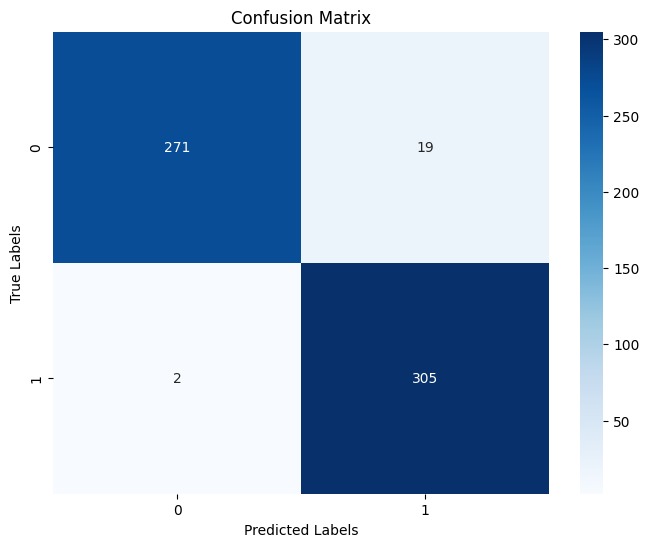

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
confusion_mat = confusion_matrix(test_labels, test_predictions)

# Create a heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# 3DCNN

In [89]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
import numpy as np

input_shape = (1,224, 224, 3)
# Convert labels to binary representation (0 for flipped, 1 for noflipped)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
test_labels = label_encoder.transform(test_labels)

def preprocess_image(image_path):
    image = load_img(image_path, target_size=input_shape)
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values
    return image

# Load and preprocess the training, validation, and test images
train_images = np.array([preprocess_image(image_path) for image_path in train_images])
val_images = np.array([preprocess_image(image_path) for image_path in val_images])
test_images = np.array([preprocess_image(image_path) for image_path in test_images])


In [92]:
batch_size = 128
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #horizontal_flip=True
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)

In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv3D, MaxPool3D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# Load the image paths from the 'flipped' and 'noflipped' subfolders
flipped_images = glob.glob(flipped_dir + '/*.jpg')
noflipped_images = glob.glob(noflipped_dir + '/*.jpg')

# Assuming you have your labels as 'flipped' and 'noflipped'
flipped_labels = ['flip'] * len(flipped_images)
noflipped_labels = ['noflip'] * len(noflipped_images)

# Concatenate the flipped and noflipped images and labels
images = flipped_images + noflipped_images
labels = flipped_labels + noflipped_labels

# Split the dataset into training, validation, and test sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the test images and labels
test_flipped_images = glob.glob(test_dir + '/flip/*.jpg')
test_noflipped_images = glob.glob(test_dir + '/notflip/*.jpg')

test_images = test_flipped_images + test_noflipped_images
test_labels = ['flip'] * len(test_flipped_images) + ['noflip'] * len(test_noflipped_images)

input_shape = (32, 128, 128)

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
test_labels = label_encoder.transform(test_labels)

num_classes = len(label_encoder.classes_)
train_labels = to_categorical(train_labels, num_classes=num_classes)
val_labels = to_categorical(val_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Preprocess function
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(input_shape[0], input_shape[1], input_shape[2]))
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values
    return image

# Load and preprocess the training, validation, and test images
train_images = np.array([preprocess_image(image_path) for image_path in train_images])
val_images = np.array([preprocess_image(image_path) for image_path in val_images])
test_images = np.array([preprocess_image(image_path) for image_path in test_images])

batch_size = 32
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)

# Model definition
model = Sequential([
    Conv3D(16, kernel_size=(3, 3, 3), padding='valid', activation='relu', input_shape=(32,128,128,1)),
    #Conv3D(16, kernel_size=(3, 3, 3), padding='valid', activation='relu'),
    #Conv3D(32, kernel_size=(3, 3, 3), padding='valid', activation='relu'),
    MaxPool3D(pool_size=(2, 2, 2)),
    BatchNormalization(),
    #Conv3D(32, kernel_size=(3, 3, 3), padding='valid', activation='relu'),
    #Conv3D(32, kernel_size=(3, 3, 3), padding='valid', activation='relu'),
    #MaxPool3D(pool_size=(2, 2, 2)),
    #BatchNormalization(),
    Flatten(),
    #Dense(2048, activation='relu'),
    #Dropout(0.6),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

# Model Compilation
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
epochs = 20
model.fit(train_generator, epochs=epochs, validation_data=(val_images, val_labels))

# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/20


c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_17/dense_37/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once
      handle._run()
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mbajd\AppData\Local\Temp\ipykernel_15252\1411515583.py", line 95, in <module>
      model.fit(train_generator, epochs=epochs, validation_data=(val_images, val_labels))
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_17/dense_37/Relu'
Matrix size-incompatible: In[0]: [32,0], In[1]: [952560,128]
	 [[{{node sequential_17/dense_37/Relu}}]] [Op:__inference_train_function_16798]

In [18]:
num_classes

2

In [101]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


model_2 = Sequential([
  Conv3D(16, kernel_size=(3, 3, 3), padding='valid', activation='relu', input_shape=(128, 224, 224, 3), data_format='channels_first'),
  Conv3D(16, kernel_size=(3, 3, 3), padding='valid', activation='relu'),
  Conv3D(32, kernel_size=(3, 3, 3), padding='valid', activation='relu'),

  MaxPool3D(pool_size=(2, 2, 2)),
  BatchNormalization(),

  Conv3D(32, kernel_size=(3, 3, 3), padding='valid', activation='relu'),
  Conv3D(32, kernel_size=(3, 3, 3), padding='valid', activation='relu'),


  MaxPool3D(pool_size=(2, 2, 2)),
  BatchNormalization(),


  Flatten(),

  #GlobalAveragePooling3D(),
  Dense(2048, activation='relu'),
  Dropout(0.6),
  Dense(512, activation='relu'),
  Dropout(0.6),
  Dense(1, activation='softmax')
])


In [102]:
# Model Compilation
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

#Model Training
epochs = 20
model.fit(train_generator, epochs=epochs, validation_data=(val_images, val_labels))

# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once
      handle._run()
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\mbajd\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mbajd\AppData\Local\Temp\ipykernel_25440\930318437.py", line 9, in <module>
      model.fit(train_generator, epochs=epochs, validation_data=(val_images, val_labels))
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\metrics\base_metric.py", line 691, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\metrics\accuracy_metrics.py", line 395, in binary_accuracy
      metrics_utils.binary_matches(y_true, y_pred, threshold), axis=-1
    File "c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\metrics_utils.py", line 934, in binary_matches
      return tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
Incompatible shapes: [128,32,32,3] vs. [128]
	 [[{{node Equal}}]] [Op:__inference_train_function_52021]